In [ ]:
# Example 1:
# Input:
#  intervals=[[1,3],[2,6],[8,10],[15,18]]

# Output:
#  [[1,6],[8,10],[15,18]]

# Explanation:
#  Since intervals [1,3] and [2,6] are overlapping we can merge them to form [1,6]
#  intervals.

# Example 2:
# Input:
#  [[1,4],[4,5]]

# Output:
#  [[1,5]]

# Explanation:
#  Since intervals [1,4] and [4,5] are overlapping we can merge them to form [1,5].

In [7]:
arr = [[1, 3], [8, 10], [2, 6], [15, 18]]

In [4]:
from typing import List

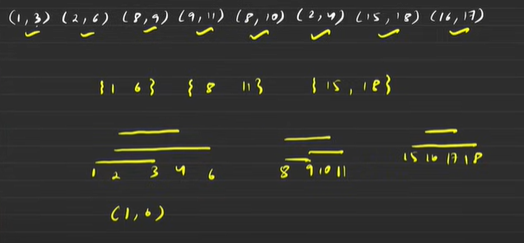

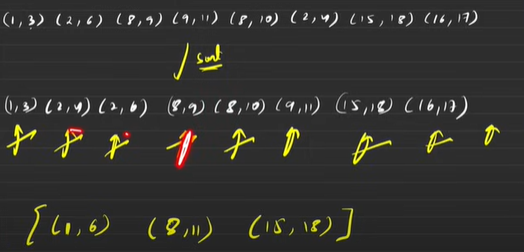

In [ ]:
def mergeOverlappingIntervals(arr: List[List[int]]) -> List[List[int]]:
    n = len(arr) # size of the array

    # sort the given intervals:
    arr.sort()
    print(arr)

    ans = []

    for i in range(n): # select an interval:
        start, end = arr[i][0], arr[i][1]  # [1, 3]
        print(ans)
        # Skip all the merged intervals:
        if ans and (end <= ans[-1][1]):
            continue
        
        # check the rest of the intervals:
        for j in range(i + 1, n):  # [2, 6],[8, 10], [15, 18]
            if arr[j][0] <= end: # 2<3
                end = max(end, arr[j][1]) # max(3,6) == 6
            else:
                break
        ans.append([start, end]) # [1,6]
    return ans

In [ ]:
# First, we will group the closer intervals by sorting the given array of intervals(if it is not already sorted).
# After that, we will select one interval at a time using a loop(say i) and insert it into our answer list(if the answer list is empty or the current interval cannot be merged with the last interval of the answer list). While traversing and inserting we will skip the intervals that lie in the last inserted interval of our answer list.
# Now, for each interval arr[i], using another loop (say j) we are going to check the rest of the intervals(i.e. From index i+1 to n-1) if they can be merged with the selected interval.
# Inside loop j, we will continue to merge all the intervals that lie in the selected interval. 
# How to check if the current interval can be merged with the selected interval:
# We will compare the current interval’s start with the end of the selected interval. If the start is smaller or equal to the end, we can conclude the current interval can be a part of the selected interval. So, we will update the selected interval’s end with the maximum(current interval’s end, selected interval’s end) in the answer list(not in the original array).
# We will break out of loop j, from the first element that cannot be a part of the selected interval.
# How to check if the current interval is not a part of the selected interval:
# We will compare the current interval’s start with the end of the selected interval. If the start is greater than the end, we can conclude the current interval cannot be a part of the selected interval.
# Finally, we will return the answer list.

In [8]:
ans = mergeOverlappingIntervals(arr)
print("The merged intervals are:")
for it in ans:
    print(f"[{it[0]}, {it[1]}]", end=" ")
print()

[[1, 3], [2, 6], [8, 10], [15, 18]]
[]
[[1, 6]]
[[1, 6]]
[[1, 6], [8, 10]]
The merged intervals are:
[1, 6] [8, 10] [15, 18] 


Time Complexity: O(N*logN) + O(2*N), where N = the size of the given array.
Reason: Sorting the given array takes  O(N*logN) time complexity. Now, after that, we are using 2 loops i and j. But while using loop i, we skip all the intervals that are merged with loop j. So, we can conclude that every interval is roughly visited twice(roughly, once for checking or skipping and once for merging). So, the time complexity will be 2*N instead of N2.

Space Complexity: O(N), as we are using an answer list to store the merged intervals. Except for the answer array, we are not using any extra space.

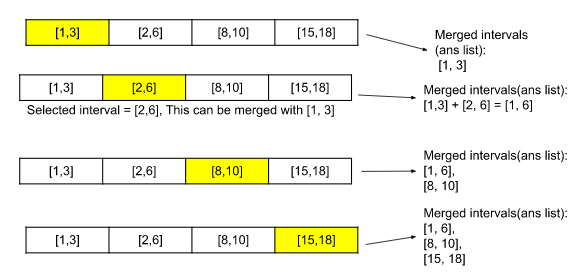

In [9]:

from typing import List

def mergeOverlappingIntervals(arr: List[List[int]]) -> List[List[int]]:
    n = len(arr) # size of the array

    # sort the given intervals:
    arr.sort()

    ans = []

    for i in range(n):
        # if the current interval does not
        # lie in the last interval:
        if not ans or (arr[i][0] > ans[-1][1]):
            ans.append(arr[i])
        # if the current interval
        # lies in the last interval:
        else:
            ans[-1][1] = max(ans[-1][1], arr[i][1])
    return ans

In [10]:
ans = mergeOverlappingIntervals(arr)
print("The merged intervals are:")
for it in ans:
    print(f"[{it[0]}, {it[1]}]", end=" ")
print()

The merged intervals are:
[1, 6] [8, 10] [15, 18] 


Time Complexity: O(N*logN) + O(N), where N = the size of the given array.
Reason: Sorting the given array takes  O(N*logN) time complexity. Now, after that, we are just using a single loop that runs for N times. So, the time complexity will be O(N).

Space Complexity: O(N), as we are using an answer list to store the merged intervals. Except for the answer array, we are not using any extra space.